In [ ]:
!pip install requests zipfile cv2 matplotlib torch torchvision

ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [ ]:
!pip install --upgrade --force-reinstall torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 439.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 121.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 20.2 MB/s eta 0:00:00


In [ ]:
import os
import glob
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import cv2
import requests
import zipfile
import numpy as np
import torch.nn as nn
import torch.optim as optim



# --- 1. DOWNLOAD AND EXTRACT DATASET ---

data_url = "https://universe.roboflow.com/ds/p8jjDsbFGl?key=Bwh2h28aje"
dataset_path = "nthu_ddd_dataset.zip"
extract_path = "nthu_ddd_dataset"

if not os.path.exists(extract_path):
    print("Downloading dataset...")
    response = requests.get(data_url, stream=True)
    with open(dataset_path, "wb") as file:
        for chunk in response.iter_content(chunk_size=1024):
            file.write(chunk)
    print("Extracting dataset...")
    with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Dataset extracted to:", extract_path)

Extracting dataset...
Dataset extracted to: nthu_ddd_dataset


In [ ]:
pip install opencv-python mediapipe numpy scikit-learn matplotlib torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 918.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install --upgrade --force-reinstall numpy
!pip install --upgrade --force-reinstall scipy scikit-learn

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.19 requires torch<2.7,>=1.10, but you have torch 2.7.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 117.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7

In [ ]:
import os
import cv2
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score

In [ ]:
import os
import cv2
import numpy as np
import mediapipe as mp
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score
from sklearn.utils.class_weight import compute_class_weight

# === Step 1: Load NTHU Dataset ===
def load_nthu_dataset(folder_path):
    samples = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(folder_path, filename)
            txt_path = img_path.replace('.jpg', '.txt')
            if not os.path.exists(txt_path): continue
            with open(txt_path, 'r') as f:
                parts = f.readline().strip().split()
                if len(parts) != 5: continue
                cls, x_c, y_c, w, h = map(float, parts)
                label = 0 if cls == 0 else 1
                samples.append((img_path, (x_c, y_c, w, h), label))
    return samples

# === Step 2: EAR and MAR Calculation ===
def compute_ear(landmarks):
    p = landmarks.reshape(-1, 3)
    left_eye = p[36:42]
    def euclidean(a, b): return np.linalg.norm(a - b)
    A = euclidean(left_eye[1], left_eye[5])
    B = euclidean(left_eye[2], left_eye[4])
    C = euclidean(left_eye[0], left_eye[3])
    ear = (A + B) / (2.0 * C + 1e-6)
    return ear

def compute_mar(landmarks):
    p = landmarks.reshape(-1, 3)
    mouth = p[60:68]
    def euclidean(a, b): return np.linalg.norm(a - b)
    A = euclidean(mouth[2], mouth[6])  # vertical
    C = euclidean(mouth[0], mouth[4])  # horizontal
    mar = A / (C + 1e-6)
    return mar

# === Step 3: Flattened Landmarks + EAR/MAR ===
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

def get_flattened_landmarks(face_img):
    h, w, _ = face_img.shape
    rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb)
    if not results.multi_face_landmarks:
        return None

    lm = results.multi_face_landmarks[0].landmark
    if len(lm) < 68: return None

    landmarks = []
    for pt in lm[:68]:
        landmarks.extend([pt.x, pt.y, pt.z])
    landmarks = np.array(landmarks, dtype=np.float32)

    ear = compute_ear(landmarks)
    mar = compute_mar(landmarks)

    return np.concatenate([landmarks, [ear, mar]], dtype=np.float32)  # shape: (206,)

# === Step 4: Extract Features ===
def extract_landmark_features(folder_path):
    samples = load_nthu_dataset(folder_path)
    X, y = [], []

    for img_path, bbox, label in samples:
        image = cv2.imread(img_path)
        h, w, _ = image.shape
        x_c, y_c, bw, bh = bbox
        x1 = int((x_c - bw / 2) * w)
        y1 = int((y_c - bh / 2) * h)
        x2 = int((x_c + bw / 2) * w)
        y2 = int((y_c + bh / 2) * h)
        face = image[y1:y2, x1:x2]
        if face.size == 0: continue

        features = get_flattened_landmarks(face)
        if features is None: continue

        X.append(features)
        y.append(label)

    return np.array(X), np.array(y)

# === Step 5: Neural Classifier ===
class LandmarkClassifier(nn.Module):
    def __init__(self, input_dim=206):
        super(LandmarkClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )
    def forward(self, x):
        return self.model(x)

# === Step 6: Train Model ===
def train_landmark_model(X_train, y_train, epochs=20):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.long)
    loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)

    model = LandmarkClassifier(input_dim=X_train.shape[1]).to(device)

    class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_train.numpy())
    weights = torch.tensor(class_weights, dtype=torch.float32).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        model.train()
        total_loss, correct = 0, 0
        for xb, yb in loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            loss = criterion(out, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            correct += (out.argmax(1) == yb).sum().item()
        acc = correct / len(loader.dataset)
        print(f"Epoch {epoch+1} | Loss: {total_loss:.4f} | Accuracy: {acc:.4f}")
    return model

# === Step 7: Evaluate ===
def evaluate_model(model, X_test, y_test):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    with torch.no_grad():
        preds = model(X_test_tensor).argmax(1).cpu().numpy()
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, zero_division=1)
    rec = recall_score(y_test, preds, zero_division=1)
    mAP = average_precision_score(y_test, preds)
    print(f"\nAccuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"mAP: {mAP:.4f}")

# === Step 8: Run Everything ===
print("Extracting landmark features with EAR & MAR...")
X_train, y_train = extract_landmark_features("nthu_ddd_dataset/train")
X_val, y_val     = extract_landmark_features("nthu_ddd_dataset/valid")
X_test, y_test   = extract_landmark_features("nthu_ddd_dataset/test")

X_all = np.vstack([X_train, X_val])
y_all = np.concatenate([y_train, y_val])

scaler = StandardScaler()
X_all = scaler.fit_transform(X_all)
X_test = scaler.transform(X_test)

print("Training model with EAR & MAR...")
model = train_landmark_model(X_all, y_all, epochs=20)

print("Evaluating on test set...")
evaluate_model(model, X_test, y_test)

Extracting landmark features with EAR & MAR...
Training model with EAR & MAR...
Epoch 1 | Loss: 19.1616 | Accuracy: 0.6583
Epoch 2 | Loss: 16.5167 | Accuracy: 0.7008
Epoch 3 | Loss: 15.4123 | Accuracy: 0.7378
Epoch 4 | Loss: 15.3452 | Accuracy: 0.7478
Epoch 5 | Loss: 14.9093 | Accuracy: 0.7522
Epoch 6 | Loss: 14.2789 | Accuracy: 0.7792
Epoch 7 | Loss: 14.0692 | Accuracy: 0.7767
Epoch 8 | Loss: 13.8603 | Accuracy: 0.7907
Epoch 9 | Loss: 13.8908 | Accuracy: 0.7922
Epoch 10 | Loss: 13.7556 | Accuracy: 0.7897
Epoch 11 | Loss: 13.4272 | Accuracy: 0.8022
Epoch 12 | Loss: 13.1478 | Accuracy: 0.7992
Epoch 13 | Loss: 12.8398 | Accuracy: 0.7972
Epoch 14 | Loss: 12.6603 | Accuracy: 0.8062
Epoch 15 | Loss: 12.6413 | Accuracy: 0.8187
Epoch 16 | Loss: 12.8159 | Accuracy: 0.8162
Epoch 17 | Loss: 12.3883 | Accuracy: 0.8217
Epoch 18 | Loss: 12.4340 | Accuracy: 0.8142
Epoch 19 | Loss: 12.1927 | Accuracy: 0.8302
Epoch 20 | Loss: 11.9669 | Accuracy: 0.8202
Evaluating on test set...

Accuracy: 0.8282
Preci

In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.19 requires torch<2.7,>=1.10, but you have torch 2.7.0 which is incompatible.
thinc 8.3.6 requires numpy

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.6 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 76.6MB/s]


Extracting landmark features using YOLOv8 + MediaPipe...

Training model...
Epoch 1 | Train Loss: 15.1683 | Train Acc: 0.6365 | Val Loss: 3.8763 | Val Acc: 0.6569
Epoch 2 | Train Loss: 13.6388 | Train Acc: 0.7078 | Val Loss: 3.4991 | Val Acc: 0.6953
Epoch 3 | Train Loss: 13.0318 | Train Acc: 0.7110 | Val Loss: 3.4313 | Val Acc: 0.7133
Epoch 4 | Train Loss: 12.3027 | Train Acc: 0.7328 | Val Loss: 3.4630 | Val Acc: 0.7088
Epoch 5 | Train Loss: 12.4902 | Train Acc: 0.7200 | Val Loss: 3.2431 | Val Acc: 0.7269
Epoch 6 | Train Loss: 11.9904 | Train Acc: 0.7482 | Val Loss: 3.4698 | Val Acc: 0.7427
Epoch 7 | Train Loss: 11.8248 | Train Acc: 0.7437 | Val Loss: 3.2035 | Val Acc: 0.7607
Epoch 8 | Train Loss: 11.5765 | Train Acc: 0.7617 | Val Loss: 3.0842 | Val Acc: 0.7652
Epoch 9 | Train Loss: 11.3399 | Train Acc: 0.7733 | Val Loss: 3.0815 | Val Acc: 0.7743
Epoch 10 | Train Loss: 11.4696 | Train Acc: 0.7816 | Val Loss: 3.0331 | Val Acc: 0.7810
Epoch 11 | Train Loss: 10.8498 | Train Acc: 0.7913 | 

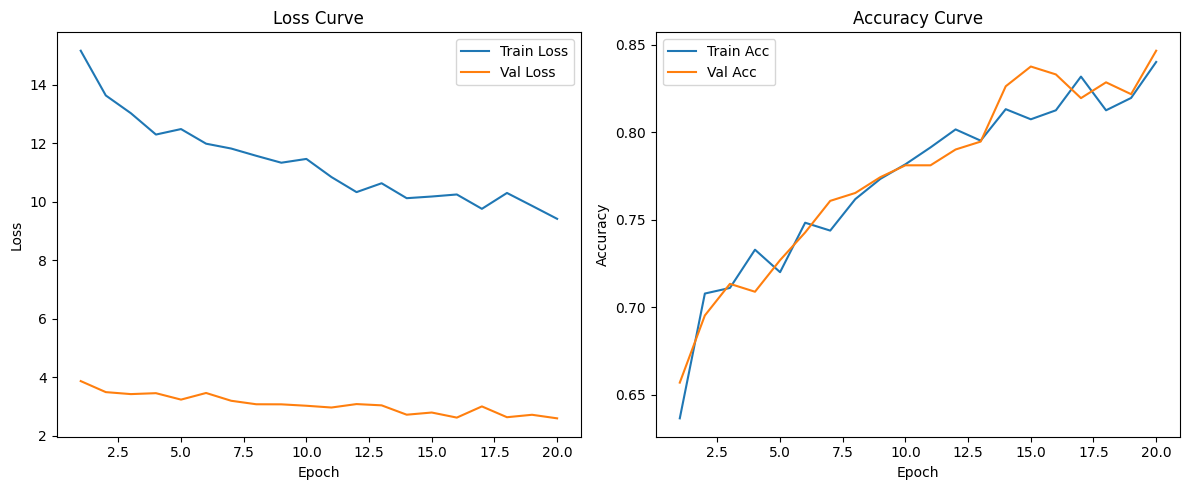


Evaluating on test set...
Test Accuracy: 0.8489 | Precision: 0.7632 | Recall: 0.7838 | mAP: 0.6693


In [ ]:
import os
import cv2
import numpy as np
import mediapipe as mp
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score
from sklearn.utils.class_weight import compute_class_weight
from ultralytics import YOLO
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# === Load Pretrained YOLOv8 ===
yolo_model = YOLO("yolov8n.pt")

# === Load NTHU Dataset ===
def load_nthu_dataset(folder_path):
    samples = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            img_path = os.path.join(folder_path, filename)
            txt_path = img_path.replace(".jpg", ".txt")
            if not os.path.exists(txt_path):
                continue
            with open(txt_path, "r") as f:
                parts = f.readline().strip().split()
                if len(parts) != 5:
                    continue
                cls, x_c, y_c, w, h = map(float, parts)
                label = 0 if cls == 0 else 1
                samples.append((img_path, (x_c, y_c, w, h), label))
    return samples

# === EAR and MAR ===
def compute_ear(landmarks):
    p = landmarks.reshape(-1, 3)
    left_eye = p[36:42]
    def euclidean(a, b): return np.linalg.norm(a - b)
    A = euclidean(left_eye[1], left_eye[5])
    B = euclidean(left_eye[2], left_eye[4])
    C = euclidean(left_eye[0], left_eye[3])
    return (A + B) / (2.0 * C + 1e-6)

def compute_mar(landmarks):
    p = landmarks.reshape(-1, 3)
    mouth = p[60:68]
    def euclidean(a, b): return np.linalg.norm(a - b)
    A = euclidean(mouth[2], mouth[6])
    C = euclidean(mouth[0], mouth[4])
    return A / (C + 1e-6)

# === MediaPipe ===
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1)

def get_flattened_landmarks(face_img):
    h, w, _ = face_img.shape
    rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb)
    if not results.multi_face_landmarks:
        return None
    lm = results.multi_face_landmarks[0].landmark
    if len(lm) < 68:
        return None
    landmarks = []
    for pt in lm[:68]:
        landmarks.extend([pt.x, pt.y, pt.z])
    landmarks = np.array(landmarks, dtype=np.float32)
    ear = compute_ear(landmarks)
    mar = compute_mar(landmarks)
    return np.concatenate([landmarks, [ear, mar]], dtype=np.float32)

# === Feature Extraction ===
def extract_landmark_features(folder_path):
    samples = load_nthu_dataset(folder_path)
    X, y = [], []
    for img_path, bbox, label in samples:
        image = cv2.imread(img_path)
        results = yolo_model.predict(source=image, verbose=False)
        if not results or len(results[0].boxes.xyxy) == 0:
            continue
        box = results[0].boxes.xyxy[0].cpu().numpy().astype(int)
        x1, y1, x2, y2 = box
        face = image[y1:y2, x1:x2]
        if face.size == 0:
            continue
        features = get_flattened_landmarks(face)
        if features is None:
            continue
        X.append(features)
        y.append(label)
    return np.array(X), np.array(y)

# === Classifier ===
class LandmarkClassifier(nn.Module):
    def __init__(self, input_dim=206):
        super(LandmarkClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )
    def forward(self, x):
        return self.model(x)

# === Train ===
def train_landmark_model(X_train, y_train, X_val, y_val, epochs=20):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.long)
    X_val = torch.tensor(X_val, dtype=torch.float32)
    y_val = torch.tensor(y_val, dtype=torch.long)
    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
    val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=64)
    model = LandmarkClassifier(input_dim=X_train.shape[1]).to(device)
    class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_train.numpy())
    weights = torch.tensor(class_weights, dtype=torch.float32).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    for epoch in range(epochs):
        model.train()
        total_loss, correct = 0, 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            loss = criterion(out, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            correct += (out.argmax(1) == yb).sum().item()
        train_acc = correct / len(train_loader.dataset)
        train_losses.append(total_loss)
        train_accuracies.append(train_acc)

        # Validation
        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                out = model(xb)
                loss = criterion(out, yb)
                val_loss += loss.item()
                val_correct += (out.argmax(1) == yb).sum().item()
        val_acc = val_correct / len(val_loader.dataset)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch+1} | Train Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

    torch.save(model.state_dict(), "landmark_classifier.pth")
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# === Evaluate ===
def evaluate_model(model, X_eval, y_eval, name="Test"):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    X_eval_tensor = torch.tensor(X_eval, dtype=torch.float32).to(device)
    with torch.no_grad():
        preds = model(X_eval_tensor).argmax(1).cpu().numpy()
    acc = accuracy_score(y_eval, preds)
    prec = precision_score(y_eval, preds, zero_division=1)
    rec = recall_score(y_eval, preds, zero_division=1)
    mAP = average_precision_score(y_eval, preds)
    print(f"{name} Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | mAP: {mAP:.4f}")

# === Plotting ===
def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Curve')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Acc')
    plt.plot(epochs, val_accuracies, label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Curve')

    plt.tight_layout()
    plt.show()

# === Main ===
print("Extracting landmark features using YOLOv8 + MediaPipe...")
X_train, y_train = extract_landmark_features("nthu_ddd_dataset/train")
X_val, y_val     = extract_landmark_features("nthu_ddd_dataset/valid")
X_test, y_test   = extract_landmark_features("nthu_ddd_dataset/test")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print("\nTraining model...")
model, tr_loss, val_loss, tr_acc, val_acc = train_landmark_model(X_train, y_train, X_val, y_val, epochs=20)

plot_training_curves(tr_loss, val_loss, tr_acc, val_acc)

print("\nEvaluating on test set...")
evaluate_model(model, X_test, y_test)

In [ ]:
#neck module

import os
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# === Dataset Loader ===
def load_nthu_dataset(folder_path):
    samples = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            img_path = os.path.join(folder_path, filename)
            txt_path = img_path.replace(".jpg", ".txt")
            if not os.path.exists(txt_path):
                continue
            with open(txt_path, "r") as f:
                parts = f.readline().strip().split()
                if len(parts) != 5:
                    continue
                cls, x_c, y_c, w, h = map(float, parts)
                label = 0 if cls == 0 else 1
                samples.append((img_path, label))
    return samples

# === CNN Modules (Backbone-Inspired from YOLOv8 Neck) ===
class ConvModule(nn.Module):
    def __init__(self, in_c, out_c, k=3, s=1, p=1):
        super().__init__()
        self.block = nn.Sequential(
            nn.Conv2d(in_c, out_c, k, s, p, bias=False),
            nn.BatchNorm2d(out_c),
            nn.SiLU()
        )
    def forward(self, x):
        return self.block(x)

class DarknetBottleneck(nn.Module):
    def __init__(self, ch):
        super().__init__()
        self.block = nn.Sequential(
            ConvModule(ch, ch),
            ConvModule(ch, ch)
        )
    def forward(self, x):
        return x + self.block(x)

class C2f(nn.Module):
    def __init__(self, in_c, out_c, num_blocks=2):
        super().__init__()
        self.split = nn.Conv2d(in_c, out_c, 1, 1, 0)
        self.blocks = nn.Sequential(*[DarknetBottleneck(out_c) for _ in range(num_blocks)])
        self.concat = nn.Conv2d(out_c, out_c, 1, 1, 0)

    def forward(self, x):
        x = self.split(x)
        x = self.blocks(x)
        return self.concat(x)

class NeckCNN(nn.Module):
    def __init__(self, in_c=3):
        super().__init__()
        self.features = nn.Sequential(
            ConvModule(in_c, 32),
            C2f(32, 64),
            ConvModule(64, 128, 3, 2),
            C2f(128, 128),
            ConvModule(128, 256, 3, 2),
            C2f(256, 256),
            nn.AdaptiveAvgPool2d(1),
        )
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.flatten(x)
        return self.classifier(x)

# === Feature Extraction ===
def extract_faces_from_nthu(folder_path, img_size=128):
    samples = load_nthu_dataset(folder_path)
    X, y = [], []
    for img_path, label in samples:
        image = cv2.imread(img_path)
        if image is None:
            continue
        face = cv2.resize(image, (img_size, img_size))
        face = face / 255.0
        X.append(face.transpose(2, 0, 1))
        y.append(label)
    return np.array(X, dtype=np.float32), np.array(y)

# === One Batch Trainer and Validator ===
def one_batch_train_eval(X_train, y_train, X_val, y_val):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    model = NeckCNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.long)
    X_val = torch.tensor(X_val, dtype=torch.float32)
    y_val = torch.tensor(y_val, dtype=torch.long)

    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
    val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=32)

    # Train on 1 batch
    model.train()
    xb, yb = next(iter(train_loader))
    xb, yb = xb.to(device), yb.to(device)
    out = model(xb)
    loss = criterion(out, yb)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_preds = out.argmax(1)
    train_acc = (train_preds == yb).float().mean().item()
    print(f"\n[Train] Loss: {loss.item():.4f} | Accuracy: {train_acc:.4f}")

    # Validate on 1 batch
    model.eval()
    with torch.no_grad():
        xb_val, yb_val = next(iter(val_loader))
        xb_val = xb_val.to(device)
        out_val = model(xb_val)
        val_loss = criterion(out_val, yb_val.to(device))
        val_preds = out_val.argmax(1).cpu()
        val_acc = accuracy_score(yb_val.numpy(), val_preds.numpy())
    print(f"[Val]   Loss: {val_loss.item():.4f} | Accuracy: {val_acc:.4f}")

# === Main Entry ===
print("Loading and processing NTHU DDD dataset (subset)...")
X_train, y_train = extract_faces_from_nthu("nthu_ddd_dataset/train")
X_val, y_val     = extract_faces_from_nthu("nthu_ddd_dataset/valid")

# Use small subset for fast debug
X_train, y_train = X_train[:64], y_train[:64]
X_val, y_val     = X_val[:64], y_val[:64]

print("Running one-batch training and validation...")
one_batch_train_eval(X_train, y_train, X_val, y_val)

Extracting YOLOv8 classification features...

Training classifier on YOLOv8 outputs...
Epoch 1 | Train Loss: 14.2653 | Train Acc: 0.6805 | Val Loss: 3.3616 | Val Acc: 0.7928
Epoch 2 | Train Loss: 10.7365 | Train Acc: 0.7866 | Val Loss: 2.6570 | Val Acc: 0.8288
Epoch 3 | Train Loss: 9.4238 | Train Acc: 0.8185 | Val Loss: 2.2978 | Val Acc: 0.8581
Epoch 4 | Train Loss: 8.4992 | Train Acc: 0.8454 | Val Loss: 2.1121 | Val Acc: 0.8694
Epoch 5 | Train Loss: 7.8157 | Train Acc: 0.8601 | Val Loss: 2.0401 | Val Acc: 0.8671
Epoch 6 | Train Loss: 7.4033 | Train Acc: 0.8741 | Val Loss: 1.8771 | Val Acc: 0.8806
Epoch 7 | Train Loss: 6.7943 | Train Acc: 0.8831 | Val Loss: 1.7199 | Val Acc: 0.9032
Epoch 8 | Train Loss: 6.2084 | Train Acc: 0.8971 | Val Loss: 1.6936 | Val Acc: 0.8964
Epoch 9 | Train Loss: 5.9184 | Train Acc: 0.9003 | Val Loss: 1.7214 | Val Acc: 0.8964
Epoch 10 | Train Loss: 5.8879 | Train Acc: 0.9016 | Val Loss: 1.6614 | Val Acc: 0.9032
Epoch 11 | Train Loss: 5.6810 | Train Acc: 0.9035 

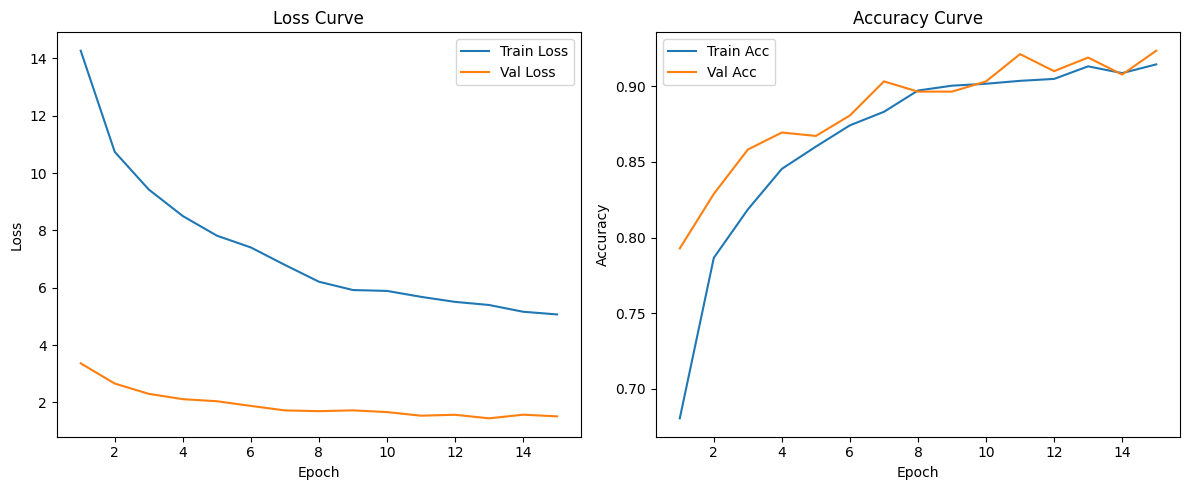


Evaluating on test set...
Test Accuracy: 0.8943 | Precision: 0.8289 | Recall: 0.8514 | mAP: 0.7542


In [ ]:
#yolov8 pretrained

import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score
from sklearn.utils.class_weight import compute_class_weight
from ultralytics import YOLO
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# === Load YOLOv8 Classification Model ===
yolo_model = YOLO("yolov8n-cls.pt")  # Ensure this model is downloaded

# === Load Dataset ===
def load_classification_samples(folder_path):
    samples = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            img_path = os.path.join(folder_path, filename)
            txt_path = img_path.replace(".jpg", ".txt")
            if not os.path.exists(txt_path):
                continue
            with open(txt_path, "r") as f:
                parts = f.readline().strip().split()
                if len(parts) != 5:
                    continue
                cls = int(float(parts[0]))
                label = 0 if cls == 0 else 1
                samples.append((img_path, label))
    return samples

# === Extract Features using YOLOv8 Classification Output ===
def extract_yolov8_class_features(folder_path):
    samples = load_classification_samples(folder_path)
    X, y = [], []
    for img_path, label in samples:
        results = yolo_model.predict(source=img_path, verbose=False)
        if not results or results[0].probs is None:
            continue
        #probs = results[0].probs.cpu().numpy()  # The original line causing the error
        probs = results[0].probs.data.cpu().numpy() # Get the underlying data as a numpy array
        X.append(probs)
        y.append(label)
    return np.array(X), np.array(y)

# === Lightweight MLP Classifier ===
class SimpleClassifier(nn.Module):
    def __init__(self, input_dim):
        super(SimpleClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 2)
        )
    def forward(self, x):
        return self.model(x)

# === Train Classifier ===
def train_simple_classifier(X_train, y_train, X_val, y_val, epochs=15):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.long)
    X_val = torch.tensor(X_val, dtype=torch.float32)
    y_val = torch.tensor(y_val, dtype=torch.long)

    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
    val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=64)

    model = SimpleClassifier(input_dim=X_train.shape[1]).to(device)
    class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_train.numpy())
    weights = torch.tensor(class_weights, dtype=torch.float32).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    for epoch in range(epochs):
        model.train()
        total_loss, correct = 0, 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            loss = criterion(out, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            correct += (out.argmax(1) == yb).sum().item()
        train_acc = correct / len(train_loader.dataset)
        train_losses.append(total_loss)
        train_accuracies.append(train_acc)

        # Validation
        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                out = model(xb)
                loss = criterion(out, yb)
                val_loss += loss.item()
                val_correct += (out.argmax(1) == yb).sum().item()
        val_acc = val_correct / len(val_loader.dataset)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch+1} | Train Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

    torch.save(model.state_dict(), "simple_yolov8_classifier.pth")
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# === Evaluate Model ===
def evaluate_model(model, X_eval, y_eval, name="Test"):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    X_eval_tensor = torch.tensor(X_eval, dtype=torch.float32).to(device)
    with torch.no_grad():
        preds = model(X_eval_tensor).argmax(1).cpu().numpy()
    acc = accuracy_score(y_eval, preds)
    prec = precision_score(y_eval, preds, zero_division=1)
    rec = recall_score(y_eval, preds, zero_division=1)
    mAP = average_precision_score(y_eval, preds)
    print(f"{name} Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | mAP: {mAP:.4f}")

# === Plot Training Curves ===
def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Curve')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Acc')
    plt.plot(epochs, val_accuracies, label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Curve')

    plt.tight_layout()
    plt.show()

# === Main ===
print("Extracting YOLOv8 classification features...")
X_train, y_train = extract_yolov8_class_features("nthu_ddd_dataset/train")
X_val, y_val     = extract_yolov8_class_features("nthu_ddd_dataset/valid")
X_test, y_test   = extract_yolov8_class_features("nthu_ddd_dataset/test")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

print("\nTraining classifier on YOLOv8 outputs...")
model, tr_loss, val_loss, tr_acc, val_acc = train_simple_classifier(X_train, y_train, X_val, y_val, epochs=15)

plot_training_curves(tr_loss, val_loss, tr_acc, val_acc)

print("\nEvaluating on test set...")
evaluate_model(model, X_test, y_test)

Extracting YOLOv8 classification features...

Training attention-based classifier on YOLOv8 outputs...
Epoch 1 | Train Loss: 14.5561 | Train Acc: 0.6607 | Val Loss: 3.5677 | Val Acc: 0.7072
Epoch 2 | Train Loss: 11.7980 | Train Acc: 0.7604 | Val Loss: 2.7674 | Val Acc: 0.8198
Epoch 3 | Train Loss: 9.2614 | Train Acc: 0.8262 | Val Loss: 2.1369 | Val Acc: 0.8626
Epoch 4 | Train Loss: 8.3270 | Train Acc: 0.8479 | Val Loss: 2.4595 | Val Acc: 0.8153
Epoch 5 | Train Loss: 7.3134 | Train Acc: 0.8728 | Val Loss: 2.1087 | Val Acc: 0.8604
Epoch 6 | Train Loss: 7.2802 | Train Acc: 0.8658 | Val Loss: 2.1182 | Val Acc: 0.8581
Epoch 7 | Train Loss: 6.8999 | Train Acc: 0.8735 | Val Loss: 1.9192 | Val Acc: 0.8626
Epoch 8 | Train Loss: 6.2923 | Train Acc: 0.8786 | Val Loss: 1.6378 | Val Acc: 0.8986
Epoch 9 | Train Loss: 6.7368 | Train Acc: 0.8773 | Val Loss: 2.1508 | Val Acc: 0.8851
Epoch 10 | Train Loss: 5.9153 | Train Acc: 0.8920 | Val Loss: 1.7425 | Val Acc: 0.9077
Epoch 11 | Train Loss: 5.6889 | Tr

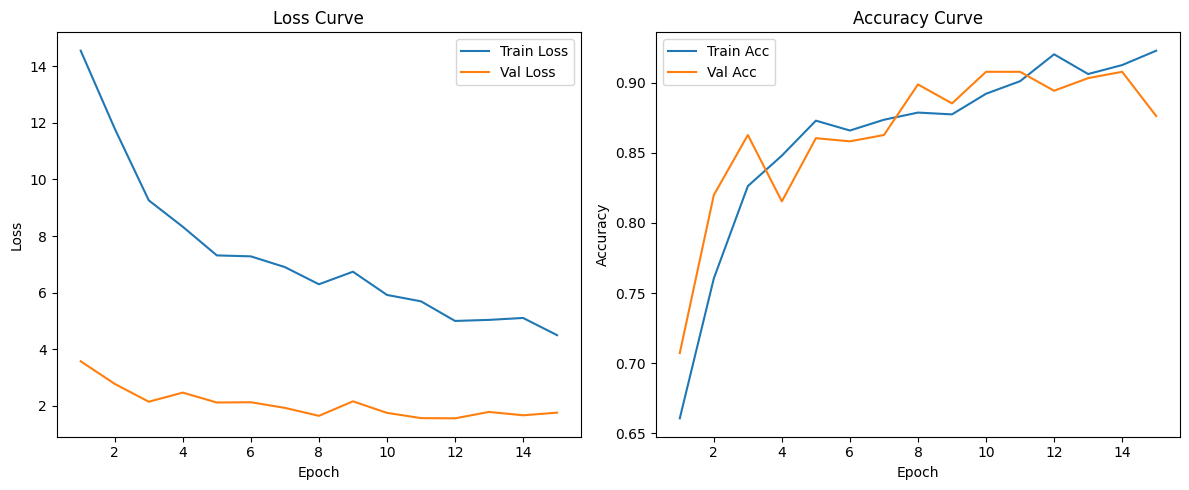


Evaluating on test set...
Test Accuracy: 0.8678 | Precision: 0.7200 | Recall: 0.9730 | mAP: 0.7094


In [ ]:
#attention
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score
from sklearn.utils.class_weight import compute_class_weight
from ultralytics import YOLO
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# === Load YOLOv8 Classification Model ===
yolo_model = YOLO("yolov8n-cls.pt")  # Ensure this model is downloaded

# === Load Dataset ===
def load_classification_samples(folder_path):
    samples = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            img_path = os.path.join(folder_path, filename)
            txt_path = img_path.replace(".jpg", ".txt")
            if not os.path.exists(txt_path):
                continue
            with open(txt_path, "r") as f:
                parts = f.readline().strip().split()
                if len(parts) != 5:
                    continue
                cls = int(float(parts[0]))
                label = 0 if cls == 0 else 1
                samples.append((img_path, label))
    return samples

# === Extract Features using YOLOv8 Classification Output ===
def extract_yolov8_class_features(folder_path):
    samples = load_classification_samples(folder_path)
    X, y = [], []
    for img_path, label in samples:
        results = yolo_model.predict(source=img_path, verbose=False)
        if not results or results[0].probs is None:
            continue
        probs = results[0].probs.data.cpu().numpy()
        X.append(probs)
        y.append(label)
    return np.array(X), np.array(y)

# === Attention-Based Classifier ===
class AttentionClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=2):
        super(AttentionClassifier, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.attn = nn.MultiheadAttention(embed_dim=hidden_dim, num_heads=num_heads, batch_first=True)
        self.fc = nn.Sequential(
            nn.LayerNorm(hidden_dim),
            nn.Linear(hidden_dim, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 2)
        )

    def forward(self, x):
        x = self.embedding(x)         # (batch_size, hidden_dim)
        x = x.unsqueeze(1)            # (batch_size, 1, hidden_dim)
        attn_output, _ = self.attn(x, x, x)
        x = attn_output.squeeze(1)    # (batch_size, hidden_dim)
        return self.fc(x)

# === Train Classifier ===
def train_simple_classifier(X_train, y_train, X_val, y_val, epochs=15):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.long)
    X_val = torch.tensor(X_val, dtype=torch.float32)
    y_val = torch.tensor(y_val, dtype=torch.long)

    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
    val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=64)

    model = AttentionClassifier(input_dim=X_train.shape[1]).to(device)
    class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_train.numpy())
    weights = torch.tensor(class_weights, dtype=torch.float32).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    for epoch in range(epochs):
        model.train()
        total_loss, correct = 0, 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            loss = criterion(out, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            correct += (out.argmax(1) == yb).sum().item()
        train_acc = correct / len(train_loader.dataset)
        train_losses.append(total_loss)
        train_accuracies.append(train_acc)

        # Validation
        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                out = model(xb)
                loss = criterion(out, yb)
                val_loss += loss.item()
                val_correct += (out.argmax(1) == yb).sum().item()
        val_acc = val_correct / len(val_loader.dataset)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch+1} | Train Loss: {total_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

    torch.save(model.state_dict(), "attention_yolov8_classifier.pth")
    return model, train_losses, val_losses, train_accuracies, val_accuracies

# === Evaluate Model ===
def evaluate_model(model, X_eval, y_eval, name="Test"):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()
    X_eval_tensor = torch.tensor(X_eval, dtype=torch.float32).to(device)
    with torch.no_grad():
        preds = model(X_eval_tensor).argmax(1).cpu().numpy()
    acc = accuracy_score(y_eval, preds)
    prec = precision_score(y_eval, preds, zero_division=1)
    rec = recall_score(y_eval, preds, zero_division=1)
    mAP = average_precision_score(y_eval, preds)
    print(f"{name} Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | mAP: {mAP:.4f}")

# === Plot Training Curves ===
def plot_training_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Curve')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Acc')
    plt.plot(epochs, val_accuracies, label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Curve')

    plt.tight_layout()
    plt.show()

# === Main ===
print("Extracting YOLOv8 classification features...")
X_train, y_train = extract_yolov8_class_features("nthu_ddd_dataset/train")
X_val, y_val     = extract_yolov8_class_features("nthu_ddd_dataset/valid")
X_test, y_test   = extract_yolov8_class_features("nthu_ddd_dataset/test")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

print("\nTraining attention-based classifier on YOLOv8 outputs...")
model, tr_loss, val_loss, tr_acc, val_acc = train_simple_classifier(X_train, y_train, X_val, y_val, epochs=15)

plot_training_curves(tr_loss, val_loss, tr_acc, val_acc)

print("\nEvaluating on test set...")
evaluate_model(model, X_test, y_test)